In [141]:
def strategy_kelly_meta(kelly_crit : float):
    def strategy_kelly(bankroll : float, previous_bankroll : float):
        return bankroll*kelly_crit
    return strategy_kelly

def strategy_lintang(bankroll : float, previous_bankroll : float):
    if bankroll > 3*10**9:
        return bankroll*0.30
    if bankroll > 3*10**9:
        return bankroll*0.30
    return bankroll*0.80

def simulate_until(init_bankroll, strategy, n_of_games):

    final_bankrolls = []
    def play(bank_roll, n_of_games_left, strategy):
        if n_of_games_left == 0:
            final_bankrolls.append(bank_roll)
            return
        br_win = bank_roll*3
        br_lose = bank_roll*0.7
        play(strategy(br_win, bank_roll), n_of_games_left-1, strategy)
        play(strategy(br_lose, bank_roll), n_of_games_left-1, strategy)

    play(init_bankroll, n_of_games, strategy)
    return final_bankrolls
import random
def simulate_with_winning_probs(init_bankroll, strategy, n_of_games, n_of_simulation, probability_of_winning, win_gain=3,lose_gain=0.7):
    final_bankrolls = []
    def play(bank_roll_exposed, bank_roll_spare, n_of_games_left, strategy):
        if n_of_games_left == 0:
            final_bankrolls.append(bank_roll_exposed+bank_roll_spare)
            return

        if random.random() <= probability_of_winning:
            br_next = bank_roll_exposed*win_gain + bank_roll_spare
        else:
            br_next = bank_roll_exposed*lose_gain + bank_roll_spare

        if br_next <= 0:
            final_bankrolls.append(0.0)
            return

        br_next_exposed = strategy(br_next, bank_roll_exposed+bank_roll_spare)
        br_next_spare = br_next - br_next_exposed
        play(br_next_exposed, br_next_spare, n_of_games_left-1, strategy)

    for _ in range(n_of_simulation):
        expose = strategy(init_bankroll,init_bankroll)
        spare = init_bankroll-expose
        play(expose,spare, n_of_games, strategy)
    return final_bankrolls

final_bankrolls = simulate_until(10000000.0,strategy_kelly_meta(0.8),7)

In [100]:
import numpy as np
val, counts = np.unique(final_bankrolls,return_counts=True)

<BarContainer object of 16 artists>

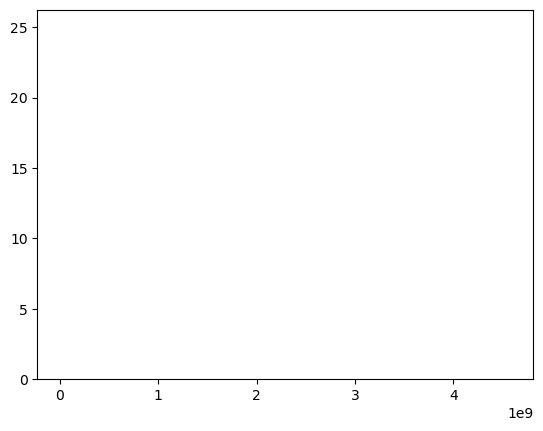

In [101]:
import matplotlib.pyplot as plt


#plt.hist(final_bankrolls,)
plt.bar(val,counts)
#plt.xscale('log')
#plt.yscale('log')

In [102]:
val, counts

(array([1.72709485e+05, 7.40183507e+05, 7.40183507e+05, 7.40183507e+05,
        3.17221503e+06, 3.17221503e+06, 3.17221503e+06, 3.17221503e+06,
        1.35952073e+07, 1.35952073e+07, 5.82651740e+07, 5.82651740e+07,
        2.49707889e+08, 2.49707889e+08, 1.07017667e+09, 4.58647142e+09]),
 array([ 1,  1,  5,  1,  1,  8, 11,  1, 14, 21, 25, 10, 11, 10,  7,  1]))

In [103]:
counts.sum()

128

In [104]:
for v,c in zip(val,counts):
    print(int(v),c/128)

172709 0.0078125
740183 0.0078125
740183 0.0390625
740183 0.0078125
3172215 0.0078125
3172215 0.0625
3172215 0.0859375
3172215 0.0078125
13595207 0.109375
13595207 0.1640625
58265174 0.1953125
58265174 0.078125
249707888 0.0859375
249707888 0.078125
1070176665 0.0546875
4586471424 0.0078125


2.2333333333333334


<Axes: ylabel='Count'>

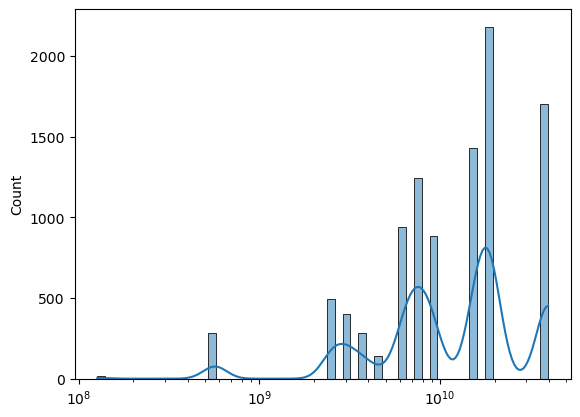

In [144]:
import seaborn as sns
probability_of_win = 0.70
probability_of_lose = 1-probability_of_win
gain_win = 3
gain_lose = 0.3
kelly_c = probability_of_win/gain_lose - probability_of_lose/gain_win
print(kelly_c)
final_bankrolls_with_probs = simulate_with_winning_probs(5*10**8,
                                                         #strategy_kelly_meta(0.3),
                                                         strategy_lintang,
                                                         5,
                                                         10000,
                                                         probability_of_win, 
                                                         1+gain_win,
                                                         1-gain_lose)
vals, counts = np.unique(final_bankrolls_with_probs,return_counts=True)
#print(vals,counts)
#sns.kdeplot(x=vals,y=counts/1000,)
sns.histplot(final_bankrolls_with_probs,kde=True,log_scale=(True,False))

In [139]:
20*10**10/(50*10**6)

4000.0

In [130]:
128*1.2*10**8

15360000000.0

In [125]:
total_below_1 = 0
for v,c in zip(vals,counts):
    if v<5*10**8:
        total_below_1 += c

print(total_below_1/10000)

0.0028
